In [1]:
import os
import time
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
sns.set()
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import sys
import tweepy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.regression import LabeledPoint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from numpy import array
from math import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from pyspark.mllib.linalg import Matrix, Matrices
from sklearn.manifold import MDS
init_notebook_mode(connected=True) #do not miss this line
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.probability import ConditionalFreqDist 
from textblob import TextBlob

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial

C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_collections.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_collections.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_collections.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_collections.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8

In [2]:
analyser = SentimentIntensityAnalyzer()
translator = Translator()

In [222]:
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1
    
def translate_gan(text):
    terj = []
    translator = Translator()
    for tw in text:
        try:
            tj = translator.translate(tw).text
            terj.append(tj)
        except:
            terj.append("")
    return terj

def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

def kecil(datas):
    a = []
    for i in datas:
        i = i.lower()
        a.append(i)
    return a

def ubah_hur(jkj):
    end = []
    dari = ["tdk","gak","ngga","ga","yg","emng","mmng","knp","stlh","gara2","krn","hrs","msh","bkn","yaa","trs","sdh","untk","dgn","mksd","gk","y","thn","jd","skrg","sampe","bapakk",'dlm','cuuuy',"yg ", 'tak','kalo','sekrng','kek','gue','sya'] 
    hasil = ["tidak","tidak","tidak","tidak","yang", "memang","memang","kenapa","setelah","karena","karena","harus","masih","bukan","ya","terus","sudah","untuk","dengan","maksud","tidak","ya","tahun","jadi","sekarang","sampai","bapak",'dalam','', "yang ",'tidak','kalau','sekarang','seperti','kamu','saya']
    for lst in jkj:
        lst = word_tokenize(lst)
        hasl = []
        for i in lst:
            if i in dari:
                index = dari.index(i)
                i = hasil[index]
                hasl.append(i)
            else:
                hasl.append(i)
        fullStr = ' '.join(hasl)
        end.append(fullStr)
        fullStr = ''
    return(end)
    

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
        input_txt = input_txt.strip()
    return input_txt

def clean_tweets(lst):
    #remvoe twitter pattern RT ex:(RT xxx)
    lst = np.vectorize(remove_pattern) (lst, "RT @[\w]*:")
    #remove twitter handles ex:(@name)
    lst = np.vectorize(remove_pattern) (lst, "@[\w]*")
    #remove url
    lst = np.vectorize(remove_pattern) (lst, "https?://[A-Za-z0-9./]*")
    #remove spesial character
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]"," ")
    lst = np.vectorize(remove_pattern) (lst, "\n|\r|&gt")
    return lst

def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    ino = 0
    for tw in lst:
        print("proses ke-",ino)
        ino = ino + 1
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

def word_cloud(wd_list):
    stopwords = ["https", "co", "RT","yang","akan","seperti","dan","atau","kembali",'lain',"yuk"] + list(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

import csv
def twitter_stream_listener(file_name,
                            filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
    class CustomStreamListener(tweepy.StreamListener):
        def __init__(self, time_limit):
            self.start_time = time.time()
            self.limit = time_limit
            # self.saveFile = open('abcd.json', 'a')
            super(CustomStreamListener, self).__init__()
        def on_status(self, status):
            if (time.time() - self.start_time) < self.limit:
                print(".", end="")
                # Writing status data
                with open(file_name, 'a', encoding="utf-8") as f:
                    writer = csv.writer(f)
                    writer.writerow([
                        status.author.screen_name, status.created_at,
                        status.text
                    ])
            else:
                print("\n\n[INFO] Closing file and ending streaming")
                return False
        def on_error(self, status_code):
            if status_code == 420:
                print('Encountered error code 420. Disconnecting the stream')
                # returning False in on_data disconnects the stream
                return False
            else:
                print('Encountered error with status code: {}'.format(
                    status_code))
                return True  # Don't kill the stream
        def on_timeout(self):
            print('Timeout...')
            return True  # Don't kill the stream
    # Writing csv titles
    print(
        '\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'
        .format(file_name, time_limit, filter_track))
    with open(file_name, 'w' ,encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(['author', 'date', 'text'])
    streamingAPI = tweepy.streaming.Stream(
        auth, CustomStreamListener(time_limit=time_limit))
    streamingAPI.filter(
        track=filter_track,
        follow=follow,
        locations=locations,
        languages=languages,
    )
    f.close()
    
def tokenize_gan(datas):
    tk = ConditionalFreqDist()
    for word in word_tokenize(datas):
        condition = len(word) 
        tk[condition][word] += 1
    print(tk)
    return list(tk)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def bersiin(data):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    a = []
    for i in data:
        i = stemmer.stem(i)
        a.append(i)
        print(len(a))
    return a

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

def hapus(lst):
    #from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    more_stopword = ["dan","di","gk","maksud","butuh","memang","kenapa","meski","foto2","tidakntengnya","tandatantidakni","jantidakni","tidakra2","di","ga","pak",",",".","?","ini","yang","#","dan","!","yg",":","kami","saya","lagi","...","masa","kenapa","harus","setelah","setelah","gara2","emng","karena","...","kalian","masih","minta","gak","ada","dari","itu","oleh","(","terus","tidak","sudah","untuk",";","dgn","&","amp","ke","yg"]

    # Merge stopword
    data = stop_factory + more_stopword

    dictionary = ArrayDictionary(data)
    stro = StopWordRemover(dictionary)

    # Aku mendengar Aisya bercerita senang kabar tuanya.
    daftar = []
        
    for i in lst:
        a = stro.remove(i)
        daftar.append(a)
    return daftar


In [4]:
consumer_key = "SuQcDFeXbQkQgtPhEQPEFJeDJ"
consumer_secret = "nPO9cIwaxdQZhWxZbuslUtMiZnwP1mfxuQn4hqDOxhz6xbeCMC"
access_token = "360823499-dJNRz9fSWNTLS7KHre0mN85bkUkONQ7mK1yYb5K1"
access_token_secret = "0IMf0YswNKGEsnZsY65PRXuMkrAj09ReckrIbTtyahw2K"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [5]:
# import time
# filter_track = ['politik','radikalisme','agama',"ulama","ustadz","presiden","radikal"]
# file_name = 'politik_agama.csv'
# twitter_stream_listener (file_name, filter_track, time_limit=600)

In [5]:
file_name = 'politik_agama1.csv'

In [189]:
df_tws = pd.read_csv(file_name)
df_tws.shape
df_tws['text'].head(5)

0    RT @Nasution_eD: Tapi kenapa negara Arab yang ...
1    RT @jiemiardian: Konselor, psikolog, psikiater...
2    RT @HACKNET__: Tak Selesaikan Kasus Novel, Har...
3    RT @jiemiardian: Konselor, psikolog, psikiater...
4    RT @faiz_farhan33: kimakgirl starter pack :\r\...
Name: text, dtype: object

In [199]:
df_tws['clean'] = df_tws['text'].str.strip()
df_tws['clean'] = ubah_hur(df_tws['clean'])
df_tws['clean'] =  clean_tweets(df_tws['clean'])
df_tws['clean'] = kecil(df_tws['clean'])

In [9]:
# df_tws['terjemahan'] = translate_gan(df_tws['clean'])

In [200]:
#change format time
df_tws = df_tws.assign(date=pd.to_datetime(df_tws.date))

print("Number of tweets: ",len(df_tws['text']))
df_tws.head(5)

Number of tweets:  5433


,author,date,text,clean
0,Gwebangets____,2019-11-12 01:27:21,RT @Nasution_eD: Tapi kenapa negara Arab yang ...,"tapi kenapa negara arab yang di salah kan,apa ..."
1,calonpasanganmu,2019-11-12 01:27:22,"RT @jiemiardian: Konselor, psikolog, psikiater...","konselor, psikolog, psikiater, dokter, guru, p..."
2,omizra,2019-11-12 01:27:23,"RT @HACKNET__: Tak Selesaikan Kasus Novel, Har...","tak selesaikan kasus novel, haris azhar: jokow..."
3,shly25898,2019-11-12 01:27:23,"RT @jiemiardian: Konselor, psikolog, psikiater...","konselor, psikolog, psikiater, dokter, guru, p..."
4,ailinnjw,2019-11-12 01:27:24,RT @faiz_farhan33: kimakgirl starter pack :\r\...,kimakgirl starter pack :- acah reject orang - ...


In [10]:
clean = list(set(df_tws["clean"]))
len(clean)

2433

In [12]:
# lk = []
# jos = []
# kl = []

In [12]:
ju = TextBlob("halo nama saya adalah tanzilal")
ju =ju.translate(to="en")
print(ju)

# cln = clean[400:00]

hello my name is tanzilal


In [13]:
# from textblob import TextBlob
lk = []
k = 0
for i in clean:
    try:
        blob = TextBlob(i)
        blob = blob.translate(to='en')
        print (k)
        print(blob)
        k += 1
        lk.append(blob)
    except:
        continue

jos = []
for i in lk:
    a = i.string
#     print("dsd")
    jos.append(a)
    
kl = []
for i in jos:
    lo = i.split()
    kl.append(lo)
kl

0
Thank you for the presence of the President in the # hut8nasdem celebration. Hopefully this gathering will continue until ...
1
I am radical, not extreme.
2
Deputy Minister of Religion: Develop a spirit of tolerance, stop debating all religions! Deputy Minister of Religion Zainut Tawhid Sa'adi ...
3
Mrs. President asked for a salary please
4
naudzubillahimindzalik ... Rasululloh saw said, "... when one people is dying, then ...
5
MUI is a mass organization. the footsteps are clear. now, halal stamp is also su ...
6
mahfud md: jokowi reported a big case but it was not revealed to the president's report just ignored especially you ...
7
a lot of the chat that we do. starting from the themes of politics, literature, history, to romance. in the romance theme section, ...
8
#beritaislam: sukmawati soekarno: the government must be militant against radicalism
9
true injustice we make as a common enemy in Indonesia because of radicalism, terrorism comes due to the lack of ...
10
prayer praye

84
sorry this guy, just because of typing the wrong English just blasphemed completely after netijen. president's turn ...
85
The President reviewed the artisan competition after opening the Indonesia Infrastructure Week (IIW) exhibition and Indonesian Construction 2019 ...
86
uncle swastiastu, for #twitter citizens who can already see the reality please pass this message to mui rather than take care ...
87
this proves that Indonesian restoration has returned. and we believe that there is no tight political touch between ...
88
it's funny, but it looks like it's from a different religion, it's not eaaaaa ~
89
lonte jg import. is there no pcy? at the headquarters there are from china, uzbekistan, russia, and the latest is said to be from lebanon ...
90
the sound of mcm kimakboy je
91
devil's hand😀
92
eh, it's already entered into the definition of buying and selling religion or not
93
why radicalism is opposed, because extremism can be compromised.
94
after the owner of the ash tour tur

163
different love religion we have the same god. but we choose a different path. until one day the power to make the kit ...
164
humans who have never been consistent not to divide positions into party supporters, sarkowi ... oh sarkowi ...
165
four major tasks of the national police chief: 1. keep the country safe. prevent intolerance3. counteract radicalism & amp; hoaks4 ...
166
to stop money politics by not depriving people of their rights to directly elect their leaders. law enforcement & amp; p ...
167
religion without religion is a defect, and religion without science is blindness
168
hobby banged sikh murka. bad image 🙄
169
he has a religion .... know for yourself 🤣🤣🤣🤣
170
#lobbyism is the legal word for corruption. , lobbyists out of the league ...
171
the tadpole commander and the psi who are keen to criticize Pak Anis's work actually become rich buzer Pak Anis because it is easily broken ...
172
right in ...
173
don't take it to heart, sis ... the issue of religion is indeed

247
it's called a religious prostitute ... her job is to sell religion for her group ...
248
masya'allah ... religious leaders freed heroes freed old people freed poor quail dibeba ...
249
to the media crew, fpi through his son-in-law, habib hanif showed a letter banning habib rizieq. h ...
250
the failure of the murder of wiranto macleod may be a sign for the fulfillment of a red and white landed destiny d ...
251
audzubillahi min assyaithonirrajiimkhilafah ngehits, many are overheated from religious books that want to replace ...
252
scabies, ringworm, smallpox on people who like things that say this .. to humanity.
253
eh really know. especially in my house complex which is surrounded by non-Muslim religions. but got a cake and a egg ...
254
if God is angry because he says it in another religion; That idiot doesn't get a cak-cak, they need to be bullied ...
255
when was sworn in by the president hehehe
256
Let the Minister understand how Bali tourism is. we are big and donate a lot 

331
⠀ ⠀ ⠀⠀⠀⠀⠀ ideals sd: president, ministers, governors junior high school: army, police, high school doctor: college booth, ipdn, kulia ...
332
do you want to be ape minister ???
333
jokowi: Indonesia needs a hero to eradicate poverty. The most important president today is Indonesia, ma'am ...
334
under the motto "we are not a hotel for is-fighters" is-terrorists with a german passport on a plane to german ...
335
The perpetrators of the Ustadz Somad were handcuffed with their hands and feet, uas: Allah swt replied that deception
336
how come here more and more embarrassing huh
337
everyone certainly wants to make things better, so do incompetent and moronic people who go into g ...
338
Finally Niel became the maid of the maid Mr. President Widodo
339
what's so clean ??? nanam banana sm firza ?? That made our religion not progress because of blind love without logic.
340
Amirul Ali - political reform of the UKM and IPTA campuses
341
The affirmation was conveyed by President Jokowi in

417
Not tolerance for people who don't have tolerance ...
418
about the criminalization of the ulema, Ustadz Abdul Somad: "When we play the law, remember the community is not stupid. Information is clearly ...
419
it's clear this is weakening the function of KPK and the show off of the president as part of an oligarchy of power that feels it has full power. ...
420
in Saudi radical preachers arrested by the government. they want to tidy up to become a free radical country. keep going perc ...
421
up up until the president gives an award. thank you for the governor who has facilitated a ...
422
Chaotic issues of faith, PBU call say greetings to other religions as tolerant symbols
423
➦ 2. league: karlsruhe - aue 1: 1 - draw record for the ksc - bild »2. league: karlsruhe - aue 1: 1 - draw record for ...
424
where can the cleric ensure Allah is angry?
425
"I must have an incentive": piqué about provocations, politics and little sleep⚽️💤 gerard piqué ...
426
how busy the president is as t

494
religion should be a cooler rather than a divider
495
Turkey shelves German suspected members
496
if this kind of behavior is never called a religious blasphemy, maybe society is more permissive to ...
497
well they started to mess up the sunnah, history and could have led to the silting of aqidah
498
never mind you guys "continue to disturb our religion, for you your religion and for me my religion because Muslims do not even me ...
499
treatment method kun fayakun | religious consultation and questions and answers on Islamic education
500
chirpified: "the reversal of the role of the majority of Muslims which has always been the political commodity of the country's elite" by htt ...
501
buya syafii about greetings of all religions: we cannot be exclusive -
502
wrong gahol ,,,, hoping to get a significant voice, mlh ambyar with religious issues. silent voters who are unwilling to be drunkards
503
Sir, appoint the President as the Minister of Defense. Then Pak Prabowo appointed Mr. 

577
Pak Rizieq Shihab is not a political asylum seeker, because Indonesia is not currently in a state of war and he is also not p ...
578
there was no court ruling stating that hti was a prohibited organization. hti just revoke the bhp. organization that din ...
579
Sweden: In many places, attacks and shootings are becoming part of big-city life via ...
580
conscience, does it still matter if the religious rules are rejected? how to find out how to ...
581
listen carefully the #lbplumayan message is really #lbp's message
582
radical = diligent disco is not necessarily naughty
583
accusing the Muslims of Indonesia of radicalism is an insult to the national heroes of the traitors ...
584
I do not want to be a Malay is but want to understand, learn and respect the non-Malays in the Malay as a tan ...
585
have attention to the issue of radicalism and how the government should (read: President Jokowi and his cabinet) answer ...
586
wow this is a danger alarm ....
587
the rise of new politic

656
President ofernern President discloses niko kovac's dismissal factor -
657
how do I want to respect people who don't want to respect ...
658
PKB considers the deputy minister not a necessity, but a political accommodation
659
in order to further strengthen the oligarchy of power sby, lbp, hp / military regime, since the cabinet announcement came up: 1. pembu ...
660
the enemy of the state that must be fought at this time is corruption, but the focus of the government now is instead fighting radicals ... fighting ...
661
political plays are masks of lies
662
The truth is that his words are true, but his love is powerless ... why not be president instead of party leader ...
663
last night the pack managed to fulfill his intention to "embrace affectionately" with the sp
664
Mui Jatim urges Muslims to avoid greeting the opening of all religions in remarks at official events. because,…
665
I do not understand the harmony in the Friday sermon, eh instead pretending to straighten the lect

738
lol really, i want to sell "halal flowers"
739
analysis is developed, meaning that the ends of all the ends of their mastermind are one with the same goal of attacking stability ...
740
so that we can understand why the issue of radicalism is aimed at young people who voice the idea of ​​the khilafah when i ...
741
Mui regulates the emotions of God. this is proof that the existence of God is regulated by humans. humans are the masterminds of Allah. ...
742
I have a feeling that I have never talked about politics any more, but why is the account starting to shake, even though I'm currently focused on bi ...
743
extraordinary ... hopefully this information can help the non-civil servant Christian religious instructors
744
the best religion is: a religion that can make you a better human being # boikotboneka212 ...
745
the language is not the language of a president.
746
that's why, he continued, the president also wants the police and prosecutors to be strengthened to help us in erad

821
that's right, sir, the money from the state would appreciate the national anthem of his own country. sane?
822
greetings #sahabatreligiada 5,815 cpns formation of the ministry of religion which will be announced tonight. consists of lecturer formations, ...
823
the impact of halal certificate is revoked and taken over by the ministry of religion 😁😀
824
grandpa .... radical 😁🤭🙏
825
it's only natural to finally want to strengthen it with the supervisory board ... because a case has been reported that it still doesn't ...
826
# # Ayohadirireuni212 ayohadirireuni212
827
case rental
828
radical date ..
829
just ignored the president let alone the others. Even though everyone has the same position in the matter of reporting, but yes ...
830
the outcome of the coalition's presidential meeting (ph), prime minister Tun Mahathir reiterated his stance ...
831
the red general genk has a radical "militant force" (rooted in blood) which is trained ...
832
wikwikwik..ustad roky gareng idol 212 cl

909
* conquer bn and defeat ph in cape piai piai: pass argument * by: * ustaz muhammad najhan halim * 1. politics in…
910
binun akutu ama people here din ,,, already like that still millions of people worship ...
911
Cdu politicians have called on the federal government to take warnings of a new asylum crisis seriously. around the ...
912
The most important thing is the intention of a hug. President Ir. Joko Widodo's greeting in the National Meeting of Java Party ...
913
he said he admitted to the chaplain looking for the stage
914
mui jatim appealed to officials not to greet all religions.
915
spirit, still a lot of other regions, remember also don't like to share documents that aren't public consumption
916
enough podcasts to discuss journalism, politics, language, and family of these issues. unfortunately not many have heard. please ...
917
jd nothing ini 😁😁😁
918
President Jokowi wants to optimize the UMKM empowerment program -
919
"all parties should stop the debate over the issue 

989
but legal people do not have a sense of belonging of China, only a few of them have nationalism ...
990
this is more important to think about, not even busy with radicals. Also, state debt, sale of state assets, power ...
991
The youth missed a great occasion in this country. if the youth in front of the international court would have already removed the young man but he would have…
992
So the conclusion is we are a dwarf nation because we are getting poorer and dumb since the Jokowi era
993
the general chair of the fpi claims to have had a recommendation from the ministry of religion and makes the fpi no longer need to renew the permit ...
994
have to play politics but do not want to ... wait for my friend to use this keris issue ... hahaha
995
more and more people are now defending religious sins
996
skali right
997
pmbnci ulama means a breakthrough.
998
assistant to the president's assistant ... hihihihi🤭🤭
999
#vegetarianism is a good thing. I did for years. until my eyes opened

1068
for me ... that bastard man is the one who insulted my religion ... because that human being is what keeps this nation noisy all the time ...
1069
every religion has tolerance. but tolerance also has a batasa.dan creator of religious songs always meet ...
1070
Surya Paloh ensured, the new Nasdem party held a presidential candidate convention two years before the 2024 election.
1071
his moral story ... his president's father is out of bounds ..... no need to talk about it .....
1072
for love in silence is actually not tasty. torture. That's right, even if you fall in love with him who is kind ...
1073
good morning admin, I want to ask, if there is a formation of political science in an institution, am I the one who moves ...
1074
all that matters is mangeang, stomach satisfied content wallet, politics one way of achieving it .... yess
1075
PBNU calls the greetings of other religions a symbol of Islamic tolerance rahmatan lil'alamin, a mercy for all humans. # boikotboneka ...
1076
5

1149
interesting logic. under the president there is the attorney general and the police chief. and they can also investigate corruption cases (want to bes ...
1150
radical
1151
try what is the reason psi supports gibran so cawalkot? on what grounds? why him and not others, for example? ...
1152
whether Islamic religious education in Indonesian schools is a form of laziness parents teach their children the Koran or ma ...
1153
President Jokowi: I don't want to import, I will bite it later!
1154
means removing the Medina charter, isn't that part of the Messenger of Allah's khilafah 😌
1155
the president is Muslim, the vice president is a kyai, the minister of religion is Muslim, but instead they are phobic and hate the teachings & amp; Islam history...…
1156
as the majority in Indonesia, Islam is very tolerant. PT is accused of being radical. if true Islam is radical, ...
1157
all our problems cannot be political while our solution needs administrative and collective work. We all do not 

1230
in Islam, the interpretation must have sanad, the interpreter 'standing on the shoulders' of the previous ulama, just made a comment ...
1231
in Indonesia there are Islam, Christianity, Catholicism, Hinduism, Buddhism, Confucianism ... Why is it only religious books that are read?
1232
Mahfud tells about the president's desire to strengthen law enforcement in Indonesia, one of which is to resolve ...
1233
a rich religious leader whose rise in rubicon or pajero is beh?
1234
why the devil free wild? Who's the greeting for this ?? 😡
1235
this country was destroyed not because of the veil and the trousers, but because of the sycophants and robbers of negararadical state money: the people of the ...
1236
enough podcasts to discuss journalism, politics, language, and the issue. unfortunately there aren't many with ...
1237
very troublesome you take care of people's religion?
1238
basherrl heh dick, jan snobs you in the rp, your face kek pussy, your old man monkeys, your religion is reli

1313
at a distance, say your child, my child, give me the most superficial questions.
1314
unexpectedly unexpectedly the ustadz twitter account gave income to the girls ...
1315
We call the various religions the national strengthening of the Wathoniyyah fellowship
1316
if it is a guy, who is proud and practices his religion well. there is a god in your heart
1317
#un #sad #eu #uk #antitrump #politik #london #france #migrationeu #politiek #bih #stopbrexit #…
1318
the name is also a radical thug
1319
2 / 383genre "islam" money money coin and russia ..., ...
1320
politics is drama!
1321
fadli zon: there is an invisible hand that wants habib rizieq not to return - indonesia inside
1322
actually handsome guy is not seen from him smoking or not it's not a problem anyway he wants a smoker ...
1323
what do you want the new win?
1324
how can Indonesia not become more corrupt, but it is only a political tool and this group of generals is to merai ...
1325
the president is not qualified now.
1326

1403
president of taste outsourcing
1404
in a political party democracy is a market for ideas .. # democratic
1405
let alone what is it ... don't be mistaken if you are called a smoker.
1406
#un #sad #eu #uk #antitrump #politics #london #france #migrationeu #politiek # bih…
1407
hahahah can't do anything, he used to be religious class maybe he didn't want to be big hahah
1408
her, bu rism
1409
in the country thanos..the liberal is mocking his cleric's fatwa
1410
maybe too many political tweets hahaha
1411
dear mui .... ask if cheating by selling religion can make God angry or not. ?? / 🤔🤔 ...
1412
PBU calls greeting other religions a symbol of tolerance
1413
the whole ethic is the religion itself. then the manners of the manners are as high as the religious manners ...
1414
Hahahaha
1415
"Dutch colonialists always refer to those who oppose the invaders as a radical group". well, it's not over the polemic about radicalism, bus ...
1416
don't care. my friends are more important than your

1492
if you are looking for, who can not behave on twitter, they will be hi ...
1493
mui. if you see from the mission of the organization, the function of the mui is as a place or forum for deliberations for scholars, zuama and ...
1494
csj! down the stairs, in a suit, on drugs. the presidential aura is coming out
1495
prohibition of interfaith greetings, risma: can't all my citizens be diverse 👏👏👏👏👏👏
1496
politics is not customary. Usually people like to say that my majors are dead, wow
1497
good do not have to look at from what religion and what ethnicity
1498
to do well in Haiti, make dirty politics of slander or bribery
1499
Imagine you are # afd'er. your party says "let ma make something for the anniversary of the pogrom night". What are you doing? one "…
1500
this is what his people / followers call the descendants of the prophet / grandson of the prophet, is this his mouth, his ...
1501
if there is evidence, just follow up. want the impact can beat the political opponents ...
15

1571
Is that true in France ... not in ... ?? 🤫🤫 (I mean in Indonesia but afraid of being accused of being radical ... 🤭🤭)
1572
I agree, for government and state matters, just universal greetings: late in the morning ...
1573
it's not strange, the alumni used to want to "finish off" someone who was opposite him. eh, instead he ...
1574
evo morales submits asylum application in mexico
1575
Islam is not an exclusive religion. No Islam is okay. as long as he loves Islam through our behavior, it's already a big thumb.
1576
what do you import? 😏air salive asynchronous hoe oilbbm potatoes potato garlic onions ...
1577
the governor feels the president..the president pks ya..ee sir because the ilc titles are fun to stir stir feelings ...
1578
wait then we who have graduated from this school so have been studying radical books? 😪
1579
ikhtilafu ummati rahmatun ..... mui jateng no problem officials say greetings of other religions
1580
but sp speeches and remarks by the president in my opinion m

1650
because the ones I saw, the ones who "emigrated" who felt like they were receiving guidance / were passionate about studying religion and major ...
1651
The president leads a limited meeting on employment creation
1652
ooooww mui cm lsm? why does the authority exceed the ministry of religion? hai3x means just bs can be disbanded and it's already arbitrary ...
1653
try to mention the characteristics if he is a scholar? humble? 2. polite language? 3. spread the word that me ...
1654
one need not put the word radical in front, it keeps writing Islam.- Radical Islam is like Nazism
1655
Mas is really fun. don't want the complicated one # boikotboneka212
1656
mayah is very radical #pbnov
1657
yeah it's right, just live being a human. not be religious. because religion is a way for humans to dissect ...
1658
2/383 "Yours Yours" Chancellor wife notice ...
1659
my club is my religion ~ #terminalmojok
1660
radical ... extremist ... militant ... fanatical ... even terrorist ... pinned to Mus

1734
Thank you for being a president without burden 😏 #shameonyoujokowi ...
1735
and what I read also according to the religion I can find in ruqyah on my own will
1736
if you think amvlop from other religion is God angry or not?
1737
imaging is only ... apruk²an like any president ..
1738
I'm a radical viewer
1739
only people who have brains as small as a cockroach still judge people by their religion!
1740
to not be a frog trapped in the shell is actually easy to get a lot of lit…
1741
ex-Minister of Religion: Muslims may pray for others despite different religions via
1742
agreed
1743
this is the assistant of the president's aide
1744
if Allah is angry, it is impossible for the people of other religions by Rezki & amp; healthy all. think .. from many tribes / religions reasonable leaders uc ...
1745
this is often the cause always prayed in my heart yes ma'am hope he is allowed to see the end ...
1746
jokowi say hello to all religions, will the mass organization issue another fatwa? 

1818
what's the fear of the employer? he said if he entered the circle of criminalization power, not ...
1819
habib rizieq's son-in-law: "the ban order must be issued at 1 syawal. right at the time of the sp3 slander chat case. after that ce ...
1820
beware of any radicalism. should be suspected if the act of radicalism that occurred is an engineering ...
1821
O parents of the +62 rich students, coffers under the pillow are still piling up right? be prepared to ...
1822
uncle suastiastu, can you please tell me that you can see the reality of who is speaking in this video? rather than taking care ...
1823
seeing that the president was waving goodbye to his people
1824
fortunately Allah, my version is good 🙂
1825
kemenag overhaul 155 religious books, including the matter of the khilafah
1826
ready, sir ustadz
1827
political prisoners are totally different from political prisoners ... if political prisoners have many factors ...
1828
our most fundamental issue over the last 5 years has be

1897
Is "president reporting" the same as "governing president"? in power politics, the word report implies fairy ...
1898
euro, refugees, climate: the frivolous handling of our money is unbearable via
1899
spirit ✊✊jgn never give up on the tyranny of the regime to the scholars & amp; Muslims don't forget to remember & amp; sara ...
1900
as a reminder, Jokowi canceled inauguration of Gunawan due to public protests. At that time Jokowi was the president who still had ...
1901
This training school is designed to fulfill the vision and mission of the president, of course ...
1902
Landeszeitung Lüneburg: stress test for the democracy pillars social psychologist dr. jonas rees investigates in a ...
1903
some Muslims exert energy to deny the love of Mother Teresa just because she is religiously different ...
1904
the religion of giving parents ... if you were born in China, what is your religion ...
1905
how can Indonesia not become more corrupt, but only become a political tool and this gro

1974
now, I believe, there are indeed radical groups in Indonesia, but not those who are veiled.
1975
whether the president has the right to report
1976
beating people, sweeping stalls that open the fasting month, closing places of worship of other religions also violate ham, camel dick!
1977
assalamu'alaikum..shalom aleichem..om swastiastu..namo culture..salamah prosper .. goodbye..sampurasun..sugeng…
1978
Boo ..!
1979
"O Messenger of Allah. indeed I do not despise morals and religion (my husband is qais), but I do not ...
1980
President Jokowi's term: "religious manipulator"! who are they ?? Khilafah, radical, intolerant! libas from earth n ...
1981
is it true that ustadz abdul somad is obeyed? is he really a victim to be defended?
1982
November 11, 1785 Diponegoro prince was born in Yogyakarta. a European painter identified the appearance of the prince during ...
1983
the silence of the israel friends inside is deafening! does not it bother anyone there that # claudia ...
1984
priva

[['Thank',
  'you',
  'for',
  'the',
  'presence',
  'of',
  'the',
  'President',
  'in',
  'the',
  '#',
  'hut8nasdem',
  'celebration.',
  'Hopefully',
  'this',
  'gathering',
  'will',
  'continue',
  'until',
  '...'],
 ['I', 'am', 'radical,', 'not', 'extreme.'],
 ['Deputy',
  'Minister',
  'of',
  'Religion:',
  'Develop',
  'a',
  'spirit',
  'of',
  'tolerance,',
  'stop',
  'debating',
  'all',
  'religions!',
  'Deputy',
  'Minister',
  'of',
  'Religion',
  'Zainut',
  'Tawhid',
  "Sa'adi",
  '...'],
 ['Mrs.', 'President', 'asked', 'for', 'a', 'salary', 'please'],
 ['naudzubillahimindzalik',
  '...',
  'Rasululloh',
  'saw',
  'said,',
  '"...',
  'when',
  'one',
  'people',
  'is',
  'dying,',
  'then',
  '...'],
 ['MUI',
  'is',
  'a',
  'mass',
  'organization.',
  'the',
  'footsteps',
  'are',
  'clear.',
  'now,',
  'halal',
  'stamp',
  'is',
  'also',
  'su',
  '...'],
 ['mahfud',
  'md:',
  'jokowi',
  'reported',
  'a',
  'big',
  'case',
  'but',
  'it',
  'wa

In [ ]:
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 
  
# stop_words = set(stopwords.words('english') + ['amp','beh',"don","mr","just"])
  
# word_tokens = word_tokenize(a) 
  
# filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
# filtered_sentence = [] 
  
# for w in word_tokens: 
#     if w not in stop_words: 
#         filtered_sentence.append(w) 
  
# # print(word_tokens) 
# # print(filtered_sentence) 
# # a = ""
# # for i in jos:
# #     b = word_tokenize(i)
# #     for z in b:
# #         a = a + " " + z
# # a

In [ ]:
# filtered_sentence

In [17]:
export_csv = clean.to_csv (r'C:\Users\Jossman\Documents\Skripsi\reference\hasil\transl_icse.csv')

AttributeError: 'list' object has no attribute 'to_csv'

In [37]:
# transl = pd.DataFrame(data={"trans": clean})
# # transl.to_csv("./file.csv", sep=',',index=False)
# transl.head()

,trans
0,
1,otaknya lg disibukin sm para cecunguk asengmem...
2,"yg tiap hari kena tuduhan radikal ,intoleran j..."
3,"2/383 ""dein seine ihre"" bundeskanzlerin frau m..."
4,bagi saya.. manusia bajingan itu manusia yang ...


In [38]:
# MyFile=open('res.txt','w')

# for element in MyList:
#     print >>MyFile, element
# MyFile.close()

NameError: name 'MyList' is not defined

In [ ]:
# datas = "The green part represents the file type, which is ‘csv.’ You must add that portion anytime you want to export your DataFrame to a CSV file. Alternatively, you may use the file type of ‘txt’ if you want to export your DataFrame to a Text file"
# datas = datas.lower()
# a = word_tokenize(datas)
# def counto(listOfTuple): 
      
#     count_map = {} 
#     for i in listOfTuple: 
#         count_map[i] = count_map.get(i, 0) +1
#     return(count_map) ear Output
  
# # Driver code 
# print("Test Case 1:") 

# b = counto(a)
# c = sorted(b.items(),key = lambda kv:(kv[1], kv[0]),reverse=True)

In [ ]:
# jos = []
# for i in lk:
#     a = i.string
# #     print("dsd")
#     jos.append(a)
# jos

In [ ]:
# # from textblob import TextBlob

# lk = []
# k = 0
# for i in clean:
#     try:
#         blob = TextBlob(i)
#         print(blob.translate(to='en'))
#         blob = blob.translate(to='en')

#         print (k)
#         k += 1
#         lk.append(blob)
#     except:
#         continue

In [ ]:
# from textblob import TextBlob
 
# blob = TextBlob("Comment vas-tu?")
 
# print(blob.detect_language())
 
# print(blob.translate(to='es'))
# print(blob.translate(to='en'))
# print(blob.translate(to='zh'))
# print(blob.translate(to='id'))

In [ ]:
# lk

In [14]:
def k_means_gan(documents):
    has = []
    clus = []
#     transl = []
#     k = 0
#     for i in documents:
#         try:
#             blob = TextBlob(i)
#             blob = blob.translate(to='en')
#             print(k,"-->",blob)
#             k+=1
#             transl.append(blob)
#         except:
#             continue
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(documents)

    true_k = 5
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)

    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind]),
            clus.append(i)
            has.append(terms[ind])
    return list(zip(has, clus))

In [15]:
a = k_means_gan(jos)

Top terms per cluster:
Cluster 0:
 political
 religious
 politics
 radicalism
 like
 just
 right
 don
 want
 god
Cluster 1:
 religion
 radical
 islam
 ministry
 minister
 don
 god
 selling
 indonesia
 different
Cluster 2:
 people
 religious
 religion
 don
 like
 president
 radical
 want
 pretending
 freed
Cluster 3:
 president
 jokowi
 mr
 just
 case
 paloh
 corruption
 bolivia
 import
 party
Cluster 4:
 greetings
 religions
 mui
 say
 muslims
 jatim
 hello
 use
 appeal
 central


In [17]:
hasil = a

In [18]:
hasil

[('political', 0),
 ('religious', 0),
 ('politics', 0),
 ('radicalism', 0),
 ('like', 0),
 ('just', 0),
 ('right', 0),
 ('don', 0),
 ('want', 0),
 ('god', 0),
 ('religion', 1),
 ('radical', 1),
 ('islam', 1),
 ('ministry', 1),
 ('minister', 1),
 ('don', 1),
 ('god', 1),
 ('selling', 1),
 ('indonesia', 1),
 ('different', 1),
 ('people', 2),
 ('religious', 2),
 ('religion', 2),
 ('don', 2),
 ('like', 2),
 ('president', 2),
 ('radical', 2),
 ('want', 2),
 ('pretending', 2),
 ('freed', 2),
 ('president', 3),
 ('jokowi', 3),
 ('mr', 3),
 ('just', 3),
 ('case', 3),
 ('paloh', 3),
 ('corruption', 3),
 ('bolivia', 3),
 ('import', 3),
 ('party', 3),
 ('greetings', 4),
 ('religions', 4),
 ('mui', 4),
 ('say', 4),
 ('muslims', 4),
 ('jatim', 4),
 ('hello', 4),
 ('use', 4),
 ('appeal', 4),
 ('central', 4)]

In [100]:
les = ""
for i,k in a:
    if k == 4:
       les += i + " "

In [102]:
# datas_gan.append(les)
datas_gan

['political religious politics radicalism like just right don want god ',
 'religion radical islam ministry minister don god selling indonesia different ',
 'people religious religion don like president radical want pretending freed ',
 'president jokowi mr just case paloh corruption bolivia import party ',
 'greetings religions mui say muslims jatim hello use appeal central ']

In [111]:
# datas_gan = pd.DataFrame(data={"Unique Word" : datas_gan},index=False)
# datas_gan
datas_ganm = pd.DataFrame(data={"Unique_Word": datas_gan},index=[1,2,3,4,5])


In [115]:
datas_ganm.Unique_Word

1    political religious politics radicalism like j...
2    religion radical islam ministry minister don g...
3    people religious religion don like president r...
4    president jokowi mr just case paloh corruption...
5    greetings religions mui say muslims jatim hell...
Name: Unique_Word, dtype: object

proses ke- 0
proses ke- 1
proses ke- 2
proses ke- 3
proses ke- 4
proses ke- 5
proses ke- 6
proses ke- 7
proses ke- 8
proses ke- 9
proses ke- 10
proses ke- 11
proses ke- 12
proses ke- 13
proses ke- 14
proses ke- 15
proses ke- 16
proses ke- 17
proses ke- 18
proses ke- 19
proses ke- 20
proses ke- 21
proses ke- 22
proses ke- 23
proses ke- 24
proses ke- 25
proses ke- 26
proses ke- 27
proses ke- 28
proses ke- 29
proses ke- 30
proses ke- 31
proses ke- 32
proses ke- 33
proses ke- 34
proses ke- 35
proses ke- 36
proses ke- 37
proses ke- 38
proses ke- 39
proses ke- 40
proses ke- 41
proses ke- 42
proses ke- 43
proses ke- 44
proses ke- 45
proses ke- 46
proses ke- 47
proses ke- 48
proses ke- 49
proses ke- 50
proses ke- 51
proses ke- 52
proses ke- 53
proses ke- 54
proses ke- 55
proses ke- 56
proses ke- 57
proses ke- 58
proses ke- 59
proses ke- 60
proses ke- 61
proses ke- 62
proses ke- 63
proses ke- 64
proses ke- 65
proses ke- 66
proses ke- 67
proses ke- 68
proses ke- 69
proses ke- 70
proses ke- 71
pr

proses ke- 554
proses ke- 555
proses ke- 556
proses ke- 557
proses ke- 558
proses ke- 559
proses ke- 560
proses ke- 561
proses ke- 562
proses ke- 563
proses ke- 564
proses ke- 565
proses ke- 566
proses ke- 567
proses ke- 568
proses ke- 569
proses ke- 570
proses ke- 571
proses ke- 572
proses ke- 573
proses ke- 574
proses ke- 575
proses ke- 576
proses ke- 577
proses ke- 578
proses ke- 579
proses ke- 580
proses ke- 581
proses ke- 582
proses ke- 583
proses ke- 584
proses ke- 585
proses ke- 586
proses ke- 587
proses ke- 588
proses ke- 589
proses ke- 590
proses ke- 591
proses ke- 592
proses ke- 593
proses ke- 594
proses ke- 595
proses ke- 596
proses ke- 597
proses ke- 598
proses ke- 599
proses ke- 600
proses ke- 601
proses ke- 602
proses ke- 603
proses ke- 604
proses ke- 605
proses ke- 606
proses ke- 607
proses ke- 608
proses ke- 609
proses ke- 610
proses ke- 611
proses ke- 612
proses ke- 613
proses ke- 614
proses ke- 615
proses ke- 616
proses ke- 617
proses ke- 618
proses ke- 619
proses ke-

proses ke- 1094
proses ke- 1095
proses ke- 1096
proses ke- 1097
proses ke- 1098
proses ke- 1099
proses ke- 1100
proses ke- 1101
proses ke- 1102
proses ke- 1103
proses ke- 1104
proses ke- 1105
proses ke- 1106
proses ke- 1107
proses ke- 1108
proses ke- 1109
proses ke- 1110
proses ke- 1111
proses ke- 1112
proses ke- 1113
proses ke- 1114
proses ke- 1115
proses ke- 1116
proses ke- 1117
proses ke- 1118
proses ke- 1119
proses ke- 1120
proses ke- 1121
proses ke- 1122
proses ke- 1123
proses ke- 1124
proses ke- 1125
proses ke- 1126
proses ke- 1127
proses ke- 1128
proses ke- 1129
proses ke- 1130
proses ke- 1131
proses ke- 1132
proses ke- 1133
proses ke- 1134
proses ke- 1135
proses ke- 1136
proses ke- 1137
proses ke- 1138
proses ke- 1139
proses ke- 1140
proses ke- 1141
proses ke- 1142
proses ke- 1143
proses ke- 1144
proses ke- 1145
proses ke- 1146
proses ke- 1147
proses ke- 1148
proses ke- 1149
proses ke- 1150
proses ke- 1151
proses ke- 1152
proses ke- 1153
proses ke- 1154
proses ke- 1155
proses k

proses ke- 1607
proses ke- 1608
proses ke- 1609
proses ke- 1610
proses ke- 1611
proses ke- 1612
proses ke- 1613
proses ke- 1614
proses ke- 1615
proses ke- 1616
proses ke- 1617
proses ke- 1618
proses ke- 1619
proses ke- 1620
proses ke- 1621
proses ke- 1622
proses ke- 1623
proses ke- 1624
proses ke- 1625
proses ke- 1626
proses ke- 1627
proses ke- 1628
proses ke- 1629
proses ke- 1630
proses ke- 1631
proses ke- 1632
proses ke- 1633
proses ke- 1634
proses ke- 1635
proses ke- 1636
proses ke- 1637
proses ke- 1638
proses ke- 1639
proses ke- 1640
proses ke- 1641
proses ke- 1642
proses ke- 1643
proses ke- 1644
proses ke- 1645
proses ke- 1646
proses ke- 1647
proses ke- 1648
proses ke- 1649
proses ke- 1650
proses ke- 1651
proses ke- 1652
proses ke- 1653
proses ke- 1654
proses ke- 1655
proses ke- 1656
proses ke- 1657
proses ke- 1658
proses ke- 1659
proses ke- 1660
proses ke- 1661
proses ke- 1662
proses ke- 1663
proses ke- 1664
proses ke- 1665
proses ke- 1666
proses ke- 1667
proses ke- 1668
proses k

proses ke- 2120
proses ke- 2121
proses ke- 2122
proses ke- 2123
proses ke- 2124
proses ke- 2125
proses ke- 2126
proses ke- 2127
proses ke- 2128
proses ke- 2129
proses ke- 2130
proses ke- 2131
proses ke- 2132
proses ke- 2133
proses ke- 2134
proses ke- 2135
proses ke- 2136
proses ke- 2137
proses ke- 2138
proses ke- 2139
proses ke- 2140
proses ke- 2141
proses ke- 2142
proses ke- 2143
proses ke- 2144
proses ke- 2145
proses ke- 2146
proses ke- 2147
proses ke- 2148
proses ke- 2149
proses ke- 2150
proses ke- 2151
proses ke- 2152
proses ke- 2153
proses ke- 2154
proses ke- 2155
proses ke- 2156
proses ke- 2157
proses ke- 2158
proses ke- 2159
proses ke- 2160
proses ke- 2161
proses ke- 2162
proses ke- 2163
proses ke- 2164
proses ke- 2165
proses ke- 2166
proses ke- 2167
proses ke- 2168
proses ke- 2169
proses ke- 2170
proses ke- 2171
proses ke- 2172
proses ke- 2173
proses ke- 2174
proses ke- 2175
proses ke- 2176
proses ke- 2177
proses ke- 2178
proses ke- 2179
proses ke- 2180
proses ke- 2181
proses k

proses ke- 2633
proses ke- 2634
proses ke- 2635
proses ke- 2636
proses ke- 2637
proses ke- 2638
proses ke- 2639
proses ke- 2640
proses ke- 2641
proses ke- 2642
proses ke- 2643
proses ke- 2644
proses ke- 2645
proses ke- 2646
proses ke- 2647
proses ke- 2648
proses ke- 2649
proses ke- 2650
proses ke- 2651
proses ke- 2652
proses ke- 2653
proses ke- 2654
proses ke- 2655
proses ke- 2656
proses ke- 2657
proses ke- 2658
proses ke- 2659
proses ke- 2660
proses ke- 2661
proses ke- 2662
proses ke- 2663
proses ke- 2664
proses ke- 2665
proses ke- 2666
proses ke- 2667
proses ke- 2668
proses ke- 2669
proses ke- 2670
proses ke- 2671
proses ke- 2672
proses ke- 2673
proses ke- 2674
proses ke- 2675
proses ke- 2676
proses ke- 2677
proses ke- 2678
proses ke- 2679
proses ke- 2680
proses ke- 2681
proses ke- 2682
proses ke- 2683
proses ke- 2684
proses ke- 2685
proses ke- 2686
proses ke- 2687
proses ke- 2688
proses ke- 2689
proses ke- 2690
proses ke- 2691
proses ke- 2692
proses ke- 2693
proses ke- 2694
proses k

proses ke- 3146
proses ke- 3147
proses ke- 3148
proses ke- 3149
proses ke- 3150
proses ke- 3151
proses ke- 3152
proses ke- 3153
proses ke- 3154
proses ke- 3155
proses ke- 3156
proses ke- 3157
proses ke- 3158
proses ke- 3159
proses ke- 3160
proses ke- 3161
proses ke- 3162
proses ke- 3163
proses ke- 3164
proses ke- 3165
proses ke- 3166
proses ke- 3167
proses ke- 3168
proses ke- 3169
proses ke- 3170
proses ke- 3171
proses ke- 3172
proses ke- 3173
proses ke- 3174
proses ke- 3175
proses ke- 3176
proses ke- 3177
proses ke- 3178
proses ke- 3179
proses ke- 3180
proses ke- 3181
proses ke- 3182
proses ke- 3183
proses ke- 3184
proses ke- 3185
proses ke- 3186
proses ke- 3187
proses ke- 3188
proses ke- 3189
proses ke- 3190
proses ke- 3191
proses ke- 3192
proses ke- 3193
proses ke- 3194
proses ke- 3195
proses ke- 3196
proses ke- 3197
proses ke- 3198
proses ke- 3199
proses ke- 3200
proses ke- 3201
proses ke- 3202
proses ke- 3203
proses ke- 3204
proses ke- 3205
proses ke- 3206
proses ke- 3207
proses k

proses ke- 3659
proses ke- 3660
proses ke- 3661
proses ke- 3662
proses ke- 3663
proses ke- 3664
proses ke- 3665
proses ke- 3666
proses ke- 3667
proses ke- 3668
proses ke- 3669
proses ke- 3670
proses ke- 3671
proses ke- 3672
proses ke- 3673
proses ke- 3674
proses ke- 3675
proses ke- 3676
proses ke- 3677
proses ke- 3678
proses ke- 3679
proses ke- 3680
proses ke- 3681
proses ke- 3682
proses ke- 3683
proses ke- 3684
proses ke- 3685
proses ke- 3686
proses ke- 3687
proses ke- 3688
proses ke- 3689
proses ke- 3690
proses ke- 3691
proses ke- 3692
proses ke- 3693
proses ke- 3694
proses ke- 3695
proses ke- 3696
proses ke- 3697
proses ke- 3698
proses ke- 3699
proses ke- 3700
proses ke- 3701
proses ke- 3702
proses ke- 3703
proses ke- 3704
proses ke- 3705
proses ke- 3706
proses ke- 3707
proses ke- 3708
proses ke- 3709
proses ke- 3710
proses ke- 3711
proses ke- 3712
proses ke- 3713
proses ke- 3714
proses ke- 3715
proses ke- 3716
proses ke- 3717
proses ke- 3718
proses ke- 3719
proses ke- 3720
proses k

proses ke- 4172
proses ke- 4173
proses ke- 4174
proses ke- 4175
proses ke- 4176
proses ke- 4177
proses ke- 4178
proses ke- 4179
proses ke- 4180
proses ke- 4181
proses ke- 4182
proses ke- 4183
proses ke- 4184
proses ke- 4185
proses ke- 4186
proses ke- 4187
proses ke- 4188
proses ke- 4189
proses ke- 4190
proses ke- 4191
proses ke- 4192
proses ke- 4193
proses ke- 4194
proses ke- 4195
proses ke- 4196
proses ke- 4197
proses ke- 4198
proses ke- 4199
proses ke- 4200
proses ke- 4201
proses ke- 4202
proses ke- 4203
proses ke- 4204
proses ke- 4205
proses ke- 4206
proses ke- 4207
proses ke- 4208
proses ke- 4209
proses ke- 4210
proses ke- 4211
proses ke- 4212
proses ke- 4213
proses ke- 4214
proses ke- 4215
proses ke- 4216
proses ke- 4217
proses ke- 4218
proses ke- 4219
proses ke- 4220
proses ke- 4221
proses ke- 4222
proses ke- 4223
proses ke- 4224
proses ke- 4225
proses ke- 4226
proses ke- 4227
proses ke- 4228
proses ke- 4229
proses ke- 4230
proses ke- 4231
proses ke- 4232
proses ke- 4233
proses k

proses ke- 4685
proses ke- 4686
proses ke- 4687
proses ke- 4688
proses ke- 4689
proses ke- 4690
proses ke- 4691
proses ke- 4692
proses ke- 4693
proses ke- 4694
proses ke- 4695
proses ke- 4696
proses ke- 4697
proses ke- 4698
proses ke- 4699
proses ke- 4700
proses ke- 4701
proses ke- 4702
proses ke- 4703
proses ke- 4704
proses ke- 4705
proses ke- 4706
proses ke- 4707
proses ke- 4708
proses ke- 4709
proses ke- 4710
proses ke- 4711
proses ke- 4712
proses ke- 4713
proses ke- 4714
proses ke- 4715
proses ke- 4716
proses ke- 4717
proses ke- 4718
proses ke- 4719
proses ke- 4720
proses ke- 4721
proses ke- 4722
proses ke- 4723
proses ke- 4724
proses ke- 4725
proses ke- 4726
proses ke- 4727
proses ke- 4728
proses ke- 4729
proses ke- 4730
proses ke- 4731
proses ke- 4732
proses ke- 4733
proses ke- 4734
proses ke- 4735
proses ke- 4736
proses ke- 4737
proses ke- 4738
proses ke- 4739
proses ke- 4740
proses ke- 4741
proses ke- 4742
proses ke- 4743
proses ke- 4744
proses ke- 4745
proses ke- 4746
proses k

proses ke- 5198
proses ke- 5199
proses ke- 5200
proses ke- 5201
proses ke- 5202
proses ke- 5203
proses ke- 5204
proses ke- 5205
proses ke- 5206
proses ke- 5207
proses ke- 5208
proses ke- 5209
proses ke- 5210
proses ke- 5211
proses ke- 5212
proses ke- 5213
proses ke- 5214
proses ke- 5215
proses ke- 5216
proses ke- 5217
proses ke- 5218
proses ke- 5219
proses ke- 5220
proses ke- 5221
proses ke- 5222
proses ke- 5223
proses ke- 5224
proses ke- 5225
proses ke- 5226
proses ke- 5227
proses ke- 5228
proses ke- 5229
proses ke- 5230
proses ke- 5231
proses ke- 5232
proses ke- 5233
proses ke- 5234
proses ke- 5235
proses ke- 5236
proses ke- 5237
proses ke- 5238
proses ke- 5239
proses ke- 5240
proses ke- 5241
proses ke- 5242
proses ke- 5243
proses ke- 5244
proses ke- 5245
proses ke- 5246
proses ke- 5247
proses ke- 5248
proses ke- 5249
proses ke- 5250
proses ke- 5251
proses ke- 5252
proses ke- 5253
proses ke- 5254
proses ke- 5255
proses ke- 5256
proses ke- 5257
proses ke- 5258
proses ke- 5259
proses k

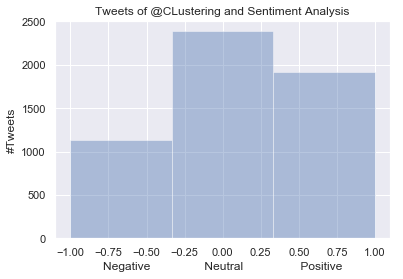

In [202]:
# clean_po['terjm'] = translate_gan(clean_po["transl"])
df_tws['sent'] = anl_tweets(df_tws.clean,title="CLustering and Sentiment Analysis", engl= False)

In [201]:
datas_ganm.Unique_Word[1]
df_tws

,author,date,text,clean
0,Gwebangets____,2019-11-12 01:27:21,RT @Nasution_eD: Tapi kenapa negara Arab yang ...,"tapi kenapa negara arab yang di salah kan,apa ..."
1,calonpasanganmu,2019-11-12 01:27:22,"RT @jiemiardian: Konselor, psikolog, psikiater...","konselor, psikolog, psikiater, dokter, guru, p..."
2,omizra,2019-11-12 01:27:23,"RT @HACKNET__: Tak Selesaikan Kasus Novel, Har...","tak selesaikan kasus novel, haris azhar: jokow..."
3,shly25898,2019-11-12 01:27:23,"RT @jiemiardian: Konselor, psikolog, psikiater...","konselor, psikolog, psikiater, dokter, guru, p..."
4,ailinnjw,2019-11-12 01:27:24,RT @faiz_farhan33: kimakgirl starter pack :\r\...,kimakgirl starter pack :- acah reject orang - ...
5,15M4Y4,2019-11-12 01:27:25,RT @AzzamIzzulhaq: Saya curiga justru yg heboh...,saya curiga justru yang heboh mempermasalahkan...
6,DodaiBc,2019-11-12 01:27:25,RT @musniumar: Sy dukung PSI terus kawal pengg...,sy dukung psi terus kawal penggunaan uang raky...
7,shaf_shahfiq,2019-11-12 01:27:25,"RT @AdDien90: Kata Nabi, ""Sesiapa meninggalkan...","kata nabi, ""sesiapa meninggalkan solat jumaat ..."
8,MayaAryakinan,2019-11-12 01:27:26,Mengucapkan Selamat Natal dan Hari Raya Agama ...,mengucapkan selamat natal dan hari raya agama ...
9,SophiaNerissa,2019-11-12 01:27:26,RT @MangAjatsCkp: Sayah pengen nanya doang...\...,sayah pengen nanya doang...kalo buku pendidika...


In [132]:
# datas_ganm.Unique_Word[0].analyser.polarity_scores()
analyser.polarity_scores(datas_ganm.Unique_Word[1])

{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.5994}

In [186]:
ab = []
for i in range(1, len(datas_gan) + 1):
    gh = analyser.polarity_scores(datas_ganm.Unique_Word[i])
    ab.append(gh)

In [203]:
ab

[{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.5994},
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2732},
 {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.7096},
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}]

In [187]:
datas_ganm

,Unique_Word,sent
1,political religious politics radicalism like j...,Positive
2,religion radical islam ministry minister don g...,Negative
3,people religious religion don like president r...,Positive
4,president jokowi mr just case paloh corruption...,Negative
5,greetings religions mui say muslims jatim hell...,Negative


In [157]:
transl = pd.DataFrame(data={"translate": lk,"string" : jos})
transl.to_csv("./hasil_icse.csv", sep=',',index=False)
transl.head

<bound method NDFrame.head of                                               translate  \
0     (T, h, a, n, k,  , y, o, u,  , f, o, r,  , t, ...   
1     (I,  , a, m,  , r, a, d, i, c, a, l, ,,  , n, ...   
2     (D, e, p, u, t, y,  , M, i, n, i, s, t, e, r, ...   
3     (M, r, s, .,  , P, r, e, s, i, d, e, n, t,  , ...   
4     (n, a, u, d, z, u, b, i, l, l, a, h, i, m, i, ...   
5     (M, U, I,  , i, s,  , a,  , m, a, s, s,  , o, ...   
6     (m, a, h, f, u, d,  , m, d, :,  , j, o, k, o, ...   
7     (a,  , l, o, t,  , o, f,  , t, h, e,  , c, h, ...   
8     (#, b, e, r, i, t, a, i, s, l, a, m, :,  , s, ...   
9     (t, r, u, e,  , i, n, j, u, s, t, i, c, e,  , ...   
10    (p, r, a, y, e, r,  , p, r, a, y, e, r,  , k, ...   
11    (a, s, s, a, l, a, m, u, ', a, l, a, i, k, u, ...   
12    (○,  , r, e, l, i, g, i, o, n, :,  , I, s, l, ...   
13    (d, o,  , n, o, t,  , b, e,  , a, f, r, a, i, ...   
14    (t, r, u, e,  , s, c, h, o, l, a, r, s,  , c, ...   
15    (1, 9, .,  , T, h, e

normal


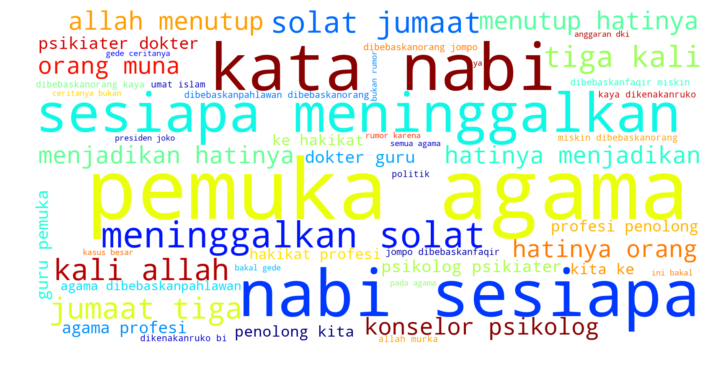

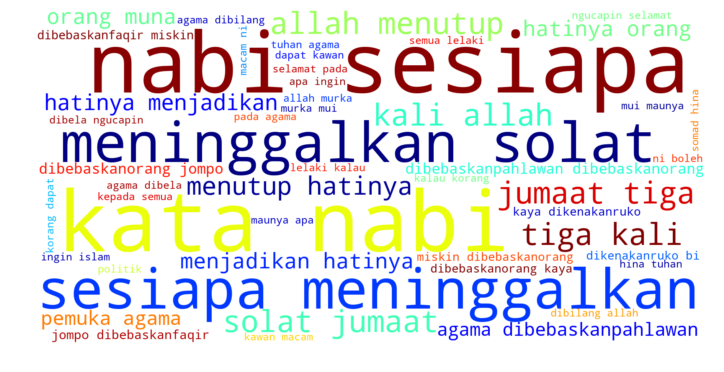

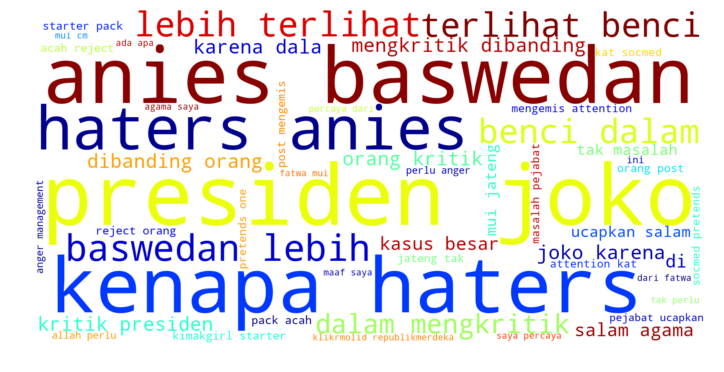

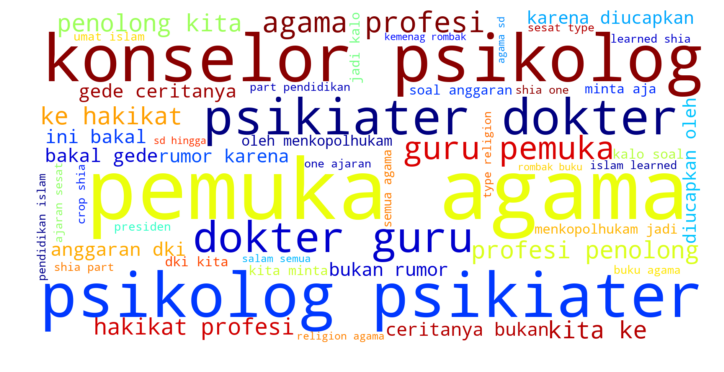

In [223]:
word_cloud(df_tws.clean)
print("normal")

# Words in positive tweets
tws_pos = df_tws['clean'][df_tws['sent'] == 1]
word_cloud(tws_pos)

tws_pos = df_tws['clean'][df_tws['sent'] == -1]
word_cloud(tws_pos)

tws_pos = df_tws['clean'][df_tws['sent'] == 0]
word_cloud(tws_pos)

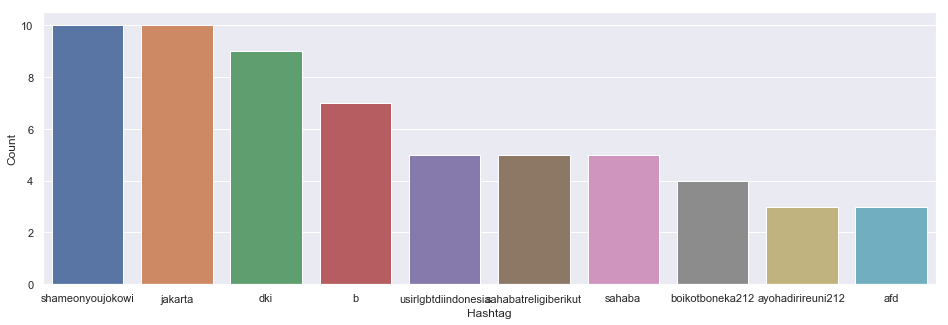

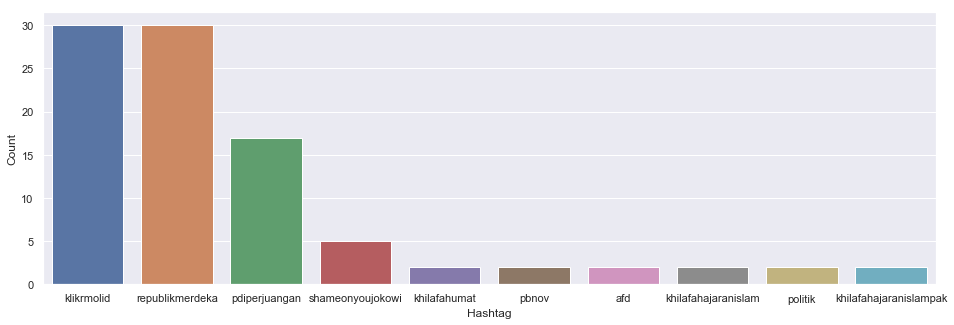

In [225]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from positive tweets

HT_positive = hashtag_extract(df_tws['clean'][df_tws['sent'] == 1])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df_tws['clean'][df_tws['sent'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


# Positive Tweets

a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()



# Negative Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

print(d)

In [1]:
print(d)

NameError: name 'd' is not defined